<a href="https://colab.research.google.com/github/HarshESC/TalkData-Mobile-Demographics/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import (
    Activation,
    Dropout,
    Flatten,
    Dense,
    BatchNormalization,
)
from tensorflow.keras import backend as K
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

from google.colab import drive 
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/"
%cd "/content/gdrive/My Drive/Final Capstone"


import warnings
warnings.filterwarnings('ignore')


Mounted at /content/gdrive
/content/gdrive/My Drive/Final Capstone


In [ ]:
master_df = pd.read_csv("master_clean_2.csv")
X = master_df.drop(columns=["num_group"])
y = master_df["num_group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=13, stratify=y
)


In [ ]:
X_test


,event_id,app_id,is_active,device_id,label_id_x,download_id,251,252,405,548,549,704,713,730,756,757,761,775,777,779,782,783,787,959,960,1007,english_phone_brand_coolpad,english_phone_brand_huawei,english_phone_brand_lshi,english_phone_brand_meizu,english_phone_brand_oppo,english_phone_brand_samsung,english_phone_brand_xiaomi,device_model_Galaxy Note 3,device_model_MI 4,device_model_MX4,device_model_MX5,device_model_Mate 7,device_model_R7s,device_model_U3,device_model_note顶配版,device_model_小米note,device_model_荣耀6,device_model_荣耀6 Plus,device_model_超级手机1 Pro,device_model_魅蓝metal,device_model_麦芒4
3972,331345,-1633912816187681087,1,-9170266620213363189,787,7642564637308507340,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
34708,3137225,4348659952760821294,1,-1665198983206396063,548,2683460969554425231,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1279,144053,-8103714741965524240,0,2596032420261205364,787,-5507682321704318876,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8021,663472,-1200607960388315089,0,5499466531572133131,713,4298858571183818042,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10225,913759,33792862810792679,0,1734050676638523012,713,1767843539449315691,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34832,3148380,-9050100410106163077,0,-1544445963999571951,787,7852197699603816588,1,0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
471,45155,7316250158002095415,0,-4483258470894206861,757,2832991687107888554,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
14095,1165984,-1073344577746533072,0,5499466531572133131,730,4426121953825600059,1,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
23610,2117736,-974457023668610292,0,-6335083146238767307,761,-7309540169907377599,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_test


3972      5
34708     5
1279     10
8021      5
10225     5
         ..
34832     4
471       1
14095     5
23610     3
12927     5
Name: num_group, Length: 7208, dtype: int64

In [ ]:
master_df["num_group"].value_counts()


5     11416
4      9521
3      5955
10     2862
9      2060
11     1697
1      1596
2       585
0       345
Name: num_group, dtype: int64

In [ ]:
# Output_dim = 12 because there are 12 different age/gender groups
output_dim = 12


In [ ]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train = to_categorical(y_train, output_dim)
y_test = to_categorical(y_test, output_dim)


# 128 Batch, 20 Epocs

# 3 Layer RELU Model with ADAM Optimizer


In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(12, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)


Epoch 1/20
226/226 [==============================] - 4s 4ms/step - loss: 63236422701678592.0000 - accuracy: 0.3089
Epoch 2/20
226/226 [==============================] - 1s 4ms/step - loss: 19599780460101632.0000 - accuracy: 0.3288
Epoch 3/20
226/226 [==============================] - 1s 4ms/step - loss: 16811627277975552.0000 - accuracy: 0.3390
Epoch 4/20
226/226 [==============================] - 1s 4ms/step - loss: 17722020758290432.0000 - accuracy: 0.3407
Epoch 5/20
226/226 [==============================] - 1s 4ms/step - loss: 15613668557324288.0000 - accuracy: 0.3337
Epoch 6/20
226/226 [==============================] - 1s 4ms/step - loss: 14648221112467456.0000 - accuracy: 0.3411
Epoch 7/20
226/226 [==============================] - 1s 4ms/step - loss: 12939458710077440.0000 - accuracy: 0.3445
Epoch 8/20
226/226 [==============================] - 1s 4ms/step - loss: 13130540731334656.0000 - accuracy: 0.3438
Epoch 9/20
226/226 [==============================] - 1s 4ms/step - loss

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])

Test accuracy: 0.3263041079044342


In [ ]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.22      0.10      0.13       319
           2       0.03      0.17      0.06       117
           3       0.38      0.40      0.39      1191
           4       0.31      0.47      0.37      1904
           5       0.68      0.24      0.36      2283
           9       0.27      0.24      0.25       412
          10       0.74      0.33      0.46       573
          11       0.11      0.28      0.16       340

    accuracy                           0.33      7208
   macro avg       0.30      0.25      0.24      7208
weighted avg       0.45      0.33      0.34      7208



In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred_arg)
  return roc_auc_score(y_test,  y_pred, average=average)


In [ ]:
multiclass_roc_auc_score(y_test_arg, y_pred_arg, average="macro")

0.5778483865704016

# 3 Layer RELU Model with SGD Optimizer


In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(12, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)


Epoch 1/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0102
Epoch 2/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 3/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 4/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 5/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 6/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 7/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 8/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 9/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 10/20
226/226 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 11/20
226/226 [========

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.00957269687205553


In [ ]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.01      1.00      0.02        69
           1       0.00      0.00      0.00       319
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00      1191
           4       0.00      0.00      0.00      1904
           5       0.00      0.00      0.00      2283
           9       0.00      0.00      0.00       412
          10       0.00      0.00      0.00       573
          11       0.00      0.00      0.00       340

    accuracy                           0.01      7208
   macro avg       0.00      0.11      0.00      7208
weighted avg       0.00      0.01      0.00      7208



In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred_arg)
  return roc_auc_score(y_test,  y_pred, average=average)


In [ ]:
multiclass_roc_auc_score(y_test_arg, y_pred_arg, average="macro")

0.5

# 3 Layer TANH Model with ADAM Optimizer

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(12, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)


Epoch 1/20
226/226 [==============================] - 1s 4ms/step - loss: 1.9556 - accuracy: 0.3629
Epoch 2/20
226/226 [==============================] - 1s 4ms/step - loss: 1.4780 - accuracy: 0.4491
Epoch 3/20
226/226 [==============================] - 1s 4ms/step - loss: 1.3829 - accuracy: 0.4784
Epoch 4/20
226/226 [==============================] - 1s 4ms/step - loss: 1.3326 - accuracy: 0.4946
Epoch 5/20
226/226 [==============================] - 1s 4ms/step - loss: 1.2944 - accuracy: 0.5141
Epoch 6/20
226/226 [==============================] - 1s 4ms/step - loss: 1.2700 - accuracy: 0.5160
Epoch 7/20
226/226 [==============================] - 1s 4ms/step - loss: 1.2436 - accuracy: 0.5321
Epoch 8/20
226/226 [==============================] - 1s 4ms/step - loss: 1.2241 - accuracy: 0.5357
Epoch 9/20
226/226 [==============================] - 1s 4ms/step - loss: 1.2067 - accuracy: 0.5426
Epoch 10/20
226/226 [==============================] - 1s 4ms/step - loss: 1.1917 - accuracy: 0.5448

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.5704772472381592


In [ ]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test_arg , y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.01      0.03        69
           1       0.76      0.35      0.48       319
           2       0.56      0.13      0.21       117
           3       0.55      0.61      0.58      1191
           4       0.50      0.62      0.55      1904
           5       0.62      0.67      0.64      2283
           9       0.57      0.46      0.51       412
          10       0.77      0.46      0.58       573
          11       0.53      0.24      0.33       340

    accuracy                           0.57      7208
   macro avg       0.58      0.40      0.43      7208
weighted avg       0.58      0.57      0.56      7208



In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred_arg)
  return roc_auc_score(y_test,  y_pred, average=average)
multiclass_roc_auc_score(y_test_arg, y_pred_arg, average="macro")

0.6665181666486082

# 3 Layer TANH Model with SGD Optimizer

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(12, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)


Epoch 1/20
226/226 [==============================] - 1s 4ms/step - loss: 2.2475 - accuracy: 0.2641
Epoch 2/20
226/226 [==============================] - 1s 4ms/step - loss: 1.8813 - accuracy: 0.3685
Epoch 3/20
226/226 [==============================] - 1s 4ms/step - loss: 1.7147 - accuracy: 0.4001
Epoch 4/20
226/226 [==============================] - 1s 4ms/step - loss: 1.6315 - accuracy: 0.4041
Epoch 5/20
226/226 [==============================] - 1s 4ms/step - loss: 1.5861 - accuracy: 0.4119
Epoch 6/20
226/226 [==============================] - 1s 4ms/step - loss: 1.5563 - accuracy: 0.4187
Epoch 7/20
226/226 [==============================] - 1s 4ms/step - loss: 1.5340 - accuracy: 0.4269
Epoch 8/20
226/226 [==============================] - 1s 4ms/step - loss: 1.5151 - accuracy: 0.4361
Epoch 9/20
226/226 [==============================] - 1s 4ms/step - loss: 1.4991 - accuracy: 0.4420
Epoch 10/20
226/226 [==============================] - 1s 4ms/step - loss: 1.4844 - accuracy: 0.4459

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.48709768056869507


In [ ]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [ ]:
res = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
print(res)


tf.Tensor(
[[   0    0    0   24   15   30    0    0    0    0    0    0]
 [   0   61    0   51   74  131    0    0    0    0    2    0]
 [   0    0    0   73   30   14    0    0    0    0    0    0]
 [   0    0    0  836  145  201    0    0    0    1    8    0]
 [   0    0    0  289  897  692    0    0    0    6   20    0]
 [   0   60    0  309  367 1483    0    0    0    0   64    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0   48  179  154    0    0    0   24    7    0]
 [   0    0    0   24  143  184    0    0    0   12  210    0]
 [   0    0    0   52  138  144    0    0    0    0    6    0]], shape=(12, 12), dtype=int32)


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.50      0.19      0.28       319
           2       0.00      0.00      0.00       117
           3       0.49      0.70      0.58      1191
           4       0.45      0.47      0.46      1904
           5       0.49      0.65      0.56      2283
           9       0.56      0.06      0.11       412
          10       0.66      0.37      0.47       573
          11       0.00      0.00      0.00       340

    accuracy                           0.49      7208
   macro avg       0.35      0.27      0.27      7208
weighted avg       0.46      0.49      0.45      7208



In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred_arg)
  return roc_auc_score(y_test,  y_pred, average=average)
multiclass_roc_auc_score(y_test_arg, y_pred_arg, average="macro")

0.596997709153109

# 3 Layer Sigmoid with ADAM Optimizer

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(12, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)


Epoch 1/20
226/226 [==============================] - 1s 4ms/step - loss: 1.6907 - accuracy: 0.3515
Epoch 2/20
226/226 [==============================] - 1s 4ms/step - loss: 1.5806 - accuracy: 0.3910
Epoch 3/20
226/226 [==============================] - 1s 4ms/step - loss: 1.5368 - accuracy: 0.4034
Epoch 4/20
226/226 [==============================] - 1s 4ms/step - loss: 1.5059 - accuracy: 0.4156
Epoch 5/20
226/226 [==============================] - 1s 4ms/step - loss: 1.4816 - accuracy: 0.4268
Epoch 6/20
226/226 [==============================] - 1s 4ms/step - loss: 1.4608 - accuracy: 0.4391
Epoch 7/20
226/226 [==============================] - 1s 4ms/step - loss: 1.4419 - accuracy: 0.4517
Epoch 8/20
226/226 [==============================] - 1s 4ms/step - loss: 1.4270 - accuracy: 0.4516
Epoch 9/20
226/226 [==============================] - 1s 4ms/step - loss: 1.4118 - accuracy: 0.4603
Epoch 10/20
226/226 [==============================] - 1s 4ms/step - loss: 1.3999 - accuracy: 0.4629

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.5036070942878723


In [ ]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.83      0.18      0.30       319
           2       0.00      0.00      0.00       117
           3       0.54      0.60      0.57      1191
           4       0.40      0.68      0.50      1904
           5       0.59      0.57      0.58      2283
           9       0.51      0.12      0.19       412
          10       0.72      0.39      0.51       573
          11       0.00      0.00      0.00       340

    accuracy                           0.50      7208
   macro avg       0.40      0.28      0.29      7208
weighted avg       0.51      0.50      0.48      7208



In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred_arg)
  return roc_auc_score(y_test,  y_pred, average=average)
multiclass_roc_auc_score(y_test_arg, y_pred_arg, average="macro")

0.6037469197058289

# 3 Layer Sigmoid with SGD Optimizer

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(12, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)


Epoch 1/20
226/226 [==============================] - 1s 4ms/step - loss: 1.8847 - accuracy: 0.2963
Epoch 2/20
226/226 [==============================] - 1s 4ms/step - loss: 1.7423 - accuracy: 0.3281
Epoch 3/20
226/226 [==============================] - 1s 4ms/step - loss: 1.7062 - accuracy: 0.3396
Epoch 4/20
226/226 [==============================] - 1s 4ms/step - loss: 1.6863 - accuracy: 0.3440
Epoch 5/20
226/226 [==============================] - 1s 4ms/step - loss: 1.6732 - accuracy: 0.3505
Epoch 6/20
226/226 [==============================] - 1s 4ms/step - loss: 1.6636 - accuracy: 0.3567
Epoch 7/20
226/226 [==============================] - 1s 4ms/step - loss: 1.6560 - accuracy: 0.3587
Epoch 8/20
226/226 [==============================] - 1s 4ms/step - loss: 1.6501 - accuracy: 0.3588
Epoch 9/20
226/226 [==============================] - 1s 4ms/step - loss: 1.6447 - accuracy: 0.3593
Epoch 10/20
226/226 [==============================] - 1s 4ms/step - loss: 1.6401 - accuracy: 0.3615

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.38249167799949646


In [ ]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.00      0.00      0.00       319
           2       0.00      0.00      0.00       117
           3       0.40      0.76      0.53      1191
           4       0.38      0.18      0.24      1904
           5       0.37      0.66      0.48      2283
           9       0.00      0.00      0.00       412
          10       0.00      0.00      0.00       573
          11       0.00      0.00      0.00       340

    accuracy                           0.38      7208
   macro avg       0.13      0.18      0.14      7208
weighted avg       0.28      0.38      0.30      7208



In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred_arg)
  return roc_auc_score(y_test,  y_pred, average=average)
multiclass_roc_auc_score(y_test_arg, y_pred_arg, average="macro")

0.5420501416170193

# 64 Batch Size, 100 Epocs

--------------------------------------------------------------------------------

# 3 Layer RELU with ADAM Optimizer 

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(12, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)


Epoch 1/100
451/451 [==============================] - 2s 4ms/step - loss: 53166588408365056.0000 - accuracy: 0.3051
Epoch 2/100
451/451 [==============================] - 2s 4ms/step - loss: 21382080218791936.0000 - accuracy: 0.3338
Epoch 3/100
451/451 [==============================] - 2s 4ms/step - loss: 18066638196703232.0000 - accuracy: 0.3362
Epoch 4/100
451/451 [==============================] - 2s 4ms/step - loss: 15160321874329600.0000 - accuracy: 0.3395
Epoch 5/100
451/451 [==============================] - 2s 4ms/step - loss: 14146242514780160.0000 - accuracy: 0.3436
Epoch 6/100
451/451 [==============================] - 2s 4ms/step - loss: 12012931185115136.0000 - accuracy: 0.3417
Epoch 7/100
451/451 [==============================] - 2s 4ms/step - loss: 10301765748523008.0000 - accuracy: 0.3462
Epoch 8/100
451/451 [==============================] - 2s 4ms/step - loss: 8650734149042176.0000 - accuracy: 0.3515
Epoch 9/100
451/451 [==============================] - 2s 4ms/ste

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.3170088827610016


In [ ]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.00      0.00      0.00       319
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00      1191
           4       1.00      0.00      0.00      1904
           5       0.32      1.00      0.48      2283
           9       0.00      0.00      0.00       412
          10       0.00      0.00      0.00       573
          11       0.00      0.00      0.00       340

    accuracy                           0.32      7208
   macro avg       0.15      0.11      0.05      7208
weighted avg       0.36      0.32      0.15      7208



In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred_arg)
  return roc_auc_score(y_test,  y_pred, average=average)
multiclass_roc_auc_score(y_test_arg, y_pred_arg, average="macro")

0.5000809173077014

# 3 Layer RELU Model with SGD Optimizer


In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(12, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)


Epoch 1/100
451/451 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0097
Epoch 2/100
451/451 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 3/100
451/451 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 4/100
451/451 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 5/100
451/451 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 6/100
451/451 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 7/100
451/451 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 8/100
451/451 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 9/100
451/451 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 10/100
451/451 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0096
Epoch 11/100
451/45

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.00957269687205553


In [ ]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.01      1.00      0.02        69
           1       0.00      0.00      0.00       319
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00      1191
           4       0.00      0.00      0.00      1904
           5       0.00      0.00      0.00      2283
           9       0.00      0.00      0.00       412
          10       0.00      0.00      0.00       573
          11       0.00      0.00      0.00       340

    accuracy                           0.01      7208
   macro avg       0.00      0.11      0.00      7208
weighted avg       0.00      0.01      0.00      7208



In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred_arg)
  return roc_auc_score(y_test,  y_pred, average=average)
multiclass_roc_auc_score(y_test_arg, y_pred_arg, average="macro")

0.5

# 3 Layer TANH Model with ADAM Optimizer

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(12, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)


Epoch 1/100
451/451 [==============================] - 2s 4ms/step - loss: 1.7665 - accuracy: 0.3849
Epoch 2/100
451/451 [==============================] - 2s 4ms/step - loss: 1.4231 - accuracy: 0.4601
Epoch 3/100
451/451 [==============================] - 2s 4ms/step - loss: 1.3506 - accuracy: 0.4843
Epoch 4/100
451/451 [==============================] - 2s 4ms/step - loss: 1.3023 - accuracy: 0.5049
Epoch 5/100
451/451 [==============================] - 2s 4ms/step - loss: 1.2679 - accuracy: 0.5181
Epoch 6/100
451/451 [==============================] - 2s 4ms/step - loss: 1.2386 - accuracy: 0.5313
Epoch 7/100
451/451 [==============================] - 2s 4ms/step - loss: 1.2151 - accuracy: 0.5449
Epoch 8/100
451/451 [==============================] - 2s 4ms/step - loss: 1.1958 - accuracy: 0.5492
Epoch 9/100
451/451 [==============================] - 2s 4ms/step - loss: 1.1789 - accuracy: 0.5554
Epoch 10/100
451/451 [==============================] - 2s 4ms/step - loss: 1.1640 - accura

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.6102941036224365


In [ ]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test_arg , y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.46      0.17      0.25        69
           1       0.61      0.40      0.48       319
           2       0.69      0.19      0.30       117
           3       0.58      0.70      0.64      1191
           4       0.56      0.63      0.59      1904
           5       0.64      0.68      0.66      2283
           9       0.74      0.36      0.48       412
          10       0.69      0.61      0.65       573
          11       0.66      0.40      0.50       340

    accuracy                           0.61      7208
   macro avg       0.63      0.46      0.51      7208
weighted avg       0.62      0.61      0.60      7208



In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred_arg)
  return roc_auc_score(y_test,  y_pred, average=average)
multiclass_roc_auc_score(y_test_arg, y_pred_arg, average="macro")

0.7018652944564027

# 3 Layer TANH Model with SGD Optimizer

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(12, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)


Epoch 1/100
451/451 [==============================] - 2s 4ms/step - loss: 2.0179 - accuracy: 0.3302
Epoch 2/100
451/451 [==============================] - 2s 4ms/step - loss: 1.6485 - accuracy: 0.3983
Epoch 3/100
451/451 [==============================] - 2s 4ms/step - loss: 1.5581 - accuracy: 0.4206
Epoch 4/100
451/451 [==============================] - 2s 4ms/step - loss: 1.5159 - accuracy: 0.4340
Epoch 5/100
451/451 [==============================] - 2s 4ms/step - loss: 1.4853 - accuracy: 0.4388
Epoch 6/100
451/451 [==============================] - 2s 4ms/step - loss: 1.4610 - accuracy: 0.4533
Epoch 7/100
451/451 [==============================] - 2s 4ms/step - loss: 1.4403 - accuracy: 0.4668
Epoch 8/100
451/451 [==============================] - 2s 4ms/step - loss: 1.4216 - accuracy: 0.4739
Epoch 9/100
451/451 [==============================] - 2s 4ms/step - loss: 1.4051 - accuracy: 0.4815
Epoch 10/100
451/451 [==============================] - 2s 4ms/step - loss: 1.3899 - accura

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.5979467034339905


In [ ]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [ ]:
res = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
print(res)


tf.Tensor(
[[  11    0    0   19   26   12    0    0    0    0    0    1]
 [   0   85    4   33   51  128    0    0    0    1    0   17]
 [   0    0   26   60   25    6    0    0    0    0    0    0]
 [   2    1    5  819  228  114    0    0    0    9    8    5]
 [   1    0    3  224 1187  375    0    0    0   75    8   31]
 [   6    0    0  245  323 1630    0    0    0   31   17   31]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    1   29   59   96    0    0    0  208   13    6]
 [   2    0    0   17   98  195    0    0    0    9  252    0]
 [   1    0    0   47   74  100    0    0    0   26    0   92]], shape=(12, 12), dtype=int32)


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.48      0.16      0.24        69
           1       0.99      0.27      0.42       319
           2       0.67      0.22      0.33       117
           3       0.55      0.69      0.61      1191
           4       0.57      0.62      0.60      1904
           5       0.61      0.71      0.66      2283
           9       0.58      0.50      0.54       412
          10       0.85      0.44      0.58       573
          11       0.50      0.27      0.35       340

    accuracy                           0.60      7208
   macro avg       0.64      0.43      0.48      7208
weighted avg       0.62      0.60      0.59      7208



In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred_arg)
  return roc_auc_score(y_test,  y_pred, average=average)
multiclass_roc_auc_score(y_test_arg, y_pred_arg, average="macro")

0.6864066336959342

# 3 Layer Sigmoid with ADAM Optimizer

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(12, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)


Epoch 1/100
451/451 [==============================] - 2s 4ms/step - loss: 1.6759 - accuracy: 0.3562
Epoch 2/100
451/451 [==============================] - 2s 4ms/step - loss: 1.5648 - accuracy: 0.3979
Epoch 3/100
451/451 [==============================] - 2s 4ms/step - loss: 1.5167 - accuracy: 0.4146
Epoch 4/100
451/451 [==============================] - 2s 4ms/step - loss: 1.4816 - accuracy: 0.4298
Epoch 5/100
451/451 [==============================] - 2s 4ms/step - loss: 1.4529 - accuracy: 0.4465
Epoch 6/100
451/451 [==============================] - 2s 4ms/step - loss: 1.4282 - accuracy: 0.4574
Epoch 7/100
451/451 [==============================] - 2s 4ms/step - loss: 1.4067 - accuracy: 0.4673
Epoch 8/100
451/451 [==============================] - 2s 4ms/step - loss: 1.3885 - accuracy: 0.4766
Epoch 9/100
451/451 [==============================] - 2s 4ms/step - loss: 1.3702 - accuracy: 0.4850
Epoch 10/100
451/451 [==============================] - 2s 4ms/step - loss: 1.3536 - accura

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.5826858878135681


In [ ]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.16      0.25        69
           1       0.94      0.35      0.51       319
           2       0.44      0.18      0.25       117
           3       0.56      0.69      0.62      1191
           4       0.59      0.57      0.58      1904
           5       0.63      0.66      0.64      2283
           9       0.49      0.40      0.44       412
          10       0.48      0.71      0.58       573
          11       0.55      0.21      0.31       340

    accuracy                           0.58      7208
   macro avg       0.59      0.44      0.46      7208
weighted avg       0.59      0.58      0.57      7208



In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred_arg)
  return roc_auc_score(y_test,  y_pred, average=average)
multiclass_roc_auc_score(y_test_arg, y_pred_arg, average="macro")

0.6888239501211972

# 3 Layer Sigmoid with SGD Optimizer

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_np.shape[1], activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(12, activation="softmax"))


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)


Epoch 1/100
451/451 [==============================] - 2s 4ms/step - loss: 1.8172 - accuracy: 0.3210
Epoch 2/100
451/451 [==============================] - 2s 4ms/step - loss: 1.6909 - accuracy: 0.3530
Epoch 3/100
451/451 [==============================] - 2s 4ms/step - loss: 1.6663 - accuracy: 0.3608
Epoch 4/100
451/451 [==============================] - 2s 4ms/step - loss: 1.6529 - accuracy: 0.3643
Epoch 5/100
451/451 [==============================] - 2s 4ms/step - loss: 1.6435 - accuracy: 0.3664
Epoch 6/100
451/451 [==============================] - 2s 4ms/step - loss: 1.6363 - accuracy: 0.3686
Epoch 7/100
451/451 [==============================] - 2s 4ms/step - loss: 1.6303 - accuracy: 0.3711
Epoch 8/100
451/451 [==============================] - 2s 4ms/step - loss: 1.6248 - accuracy: 0.3721
Epoch 9/100
451/451 [==============================] - 2s 4ms/step - loss: 1.6196 - accuracy: 0.3754
Epoch 10/100
451/451 [==============================] - 2s 4ms/step - loss: 1.6150 - accura

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])


Test accuracy: 0.4732241928577423


In [ ]:
y_pred = model.predict(X_test)
y_test_arg = tf.argmax(y_test, 1)
y_pred_arg = tf.argmax(y_pred, 1)


In [ ]:
print("Classification Report:")
print()
print(classification_report(y_test_arg, y_pred_arg))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.95      0.18      0.30       319
           2       0.00      0.00      0.00       117
           3       0.46      0.72      0.56      1191
           4       0.47      0.31      0.37      1904
           5       0.46      0.76      0.57      2283
           9       0.00      0.00      0.00       412
          10       0.67      0.32      0.43       573
          11       0.00      0.00      0.00       340

    accuracy                           0.47      7208
   macro avg       0.33      0.25      0.25      7208
weighted avg       0.44      0.47      0.42      7208



In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred_arg)
  return roc_auc_score(y_test,  y_pred, average=average)
multiclass_roc_auc_score(y_test_arg, y_pred_arg, average="macro")

0.5865609716028897

# Results

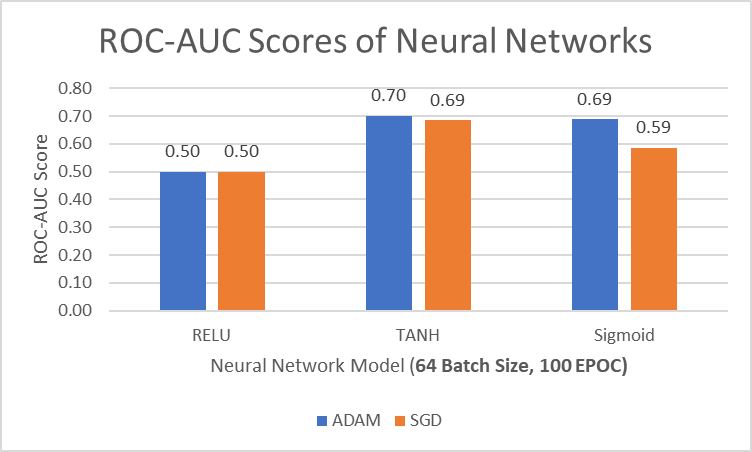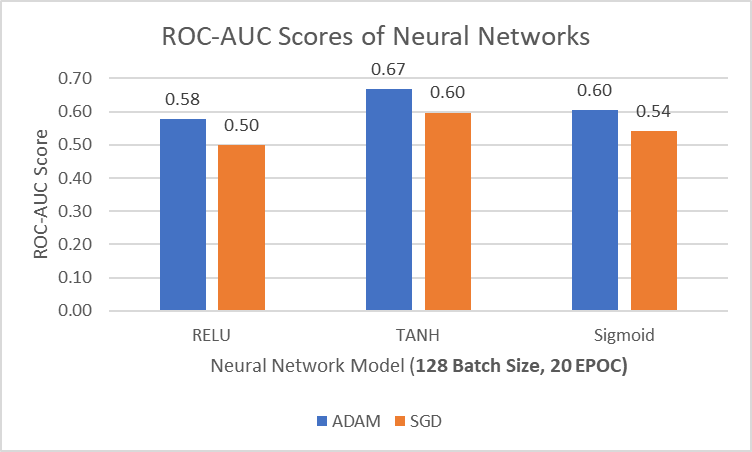

# Analysis

When creating the Deep Learning model, I used three different activation functions:  RELU, Tanh, and Sigmoid.

Each model only consisted of three layers, with two different optimizers applied for each model.  The optimizers are:  ADAM & SGD

Once I was able to determine which activation function and which optimizer provided the best results, I had increased the amount of epochs from 20 to 100.  I also decreased the batch size in the second table to see if it made a difference in accuracy.

Overall, it made a very small difference.  The most gain a model received was TANH Model with the SGD Optimizer, rising from 0.50 to 0.58 accuracy.  

The highest accuracy I was able to get was 0.70 from the TANH Model with ADAM Optimizer with the Batch Size set at 64 with an EPOC level at 100.  
